In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
mnist= input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
x_train = mnist.train.images
x_test = mnist.test.images
y_train = mnist.train.labels
y_test = mnist.test.labels

In [7]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
x_train.shape

(55000, 784)

In [16]:
y_train.shape

(55000, 10)

In [17]:
x = tf.placeholder( tf.float32, [None,784])
y = tf.constant( y_train, tf.float32)

In [18]:
# w1 = tf.Variable( tf.random_uniform([784,100 ]) )
# b1 = tf.Variable( tf.random_uniform([100]) )
# w2 = tf.Variable( tf.random_uniform([100,10 ]) )
# b2 = tf.Variable( tf.random_uniform([10]) )

In [1]:
w1 = tf.get_Variable( 'w1'[784,100], initializer=tf.contrib.layer.xaver_initializer()) 
b1 = tf.get_Variable( 'b1'[100], initializer=tf.contrib.layer.xaver_initializer())
w2 = tf.get_Variable( 'w2'[100,10], initializer=tf.contrib.layer.xaver_initializer())
b2 = tf.get_Variable( 'b2'[10], initializer=tf.contrib.layer.xaver_initializer())

NameError: name 'tf' is not defined

In [19]:
z1 = tf.matmul( x, w1) + b1
lay1 = tf.nn.relu( z1 )
z2 = tf.matmul( lay1, w2 ) + b2
hx = tf.nn.softmax( z2 )

In [20]:
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=z2,
                                            labels=y)
cost = tf.reduce_mean(cost_i)

In [21]:
optimizer = tf.train.GradientDescentOptimizer(0.1)#learning rate
train = optimizer.minimize( cost )
sess = tf.Session()
init =tf.global_variables_initializer()
sess.run( init)

In [22]:
for i in range(1000):
    sess.run( train, {x:x_train})
    print( i, sess.run( cost, {x:x_train}))

0 3759.129
1 6435.8457
2 8292.226
3 7612.6733
4 7093.0527
5 5701.437
6 3380.4136
7 1174.4827
8 308.51218
9 161.12321
10 105.50362
11 76.46058
12 59.108112
13 47.871964
14 40.12402
15 34.513386
16 30.279854
17 26.98326
18 24.341911
19 22.183126
20 20.384472
21 18.865908
22 17.567398
23 16.446653
24 15.470584
25 14.612
26 13.85008
27 13.170564
28 12.559378
29 12.008425
30 11.509326
31 11.054478
32 10.639291
33 10.257789
34 9.906706
35 9.583086
36 9.283445
37 9.005593
38 8.747293
39 8.506109
40 8.280679
41 8.069789
42 7.8720436
43 7.6863947
44 7.5112295
45 7.3461375
46 7.1902933
47 7.0428543
48 6.90305
49 6.7702103
50 6.644027
51 6.5238934
52 6.4096155
53 6.30066
54 6.1967263
55 6.0974717
56 6.002615
57 5.911859
58 5.8250866
59 5.741871
60 5.6620774
61 5.5855136
62 5.5120387
63 5.441365
64 5.3734274
65 5.308143
66 5.2452445
67 5.1845727
68 5.125994
69 5.069459
70 5.014996
71 4.9623413
72 4.9114327
73 4.8622193
74 4.814673
75 4.7687364
76 4.7241945
77 4.681033
78 4.6392655
79 4.5987244
80 

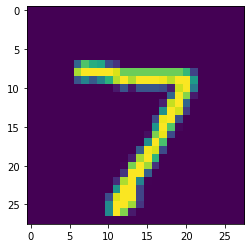

In [24]:
plt.imshow( x_test[0].reshape(28,28))
plt.show()

In [27]:
sess.run( hx, {x:x_test[[0]]}).argmax( axis=1)

array([1], dtype=int64)